# Labrapport TFY4125 Fysikk Vår 2024
*Skriv fullt navn på gruppas medlemmer samt dato for innlevering.*

Navn:  Kristian Abusdal, Daniel Fosli Stenseth, Ottar Aakerøy Moe, Vetle Rød Dahl, Melina Rahimi <br>
Institutt for Fysikk, NTNU <br>
Dato:


## Sammendrag
*Skriv en kort oppsummering av labprosjektet. Skriv denne delen helt til slutt. Beskriv eksperimentet og de numeriske beregningene. Fokuser på resultatene. Oppgi midlere tap i mekanisk energi med tilhørende usikkerhet (standardfeil). Bruk maksimalt 5 setninger.*

Dette eksperimentet har simulert en kule som triller på bane og har regnet ut en rekke verdier fra dette; bl. a. Kin. energi.  det er så utført fysiske forsøk med tilnærmet lik bane, der energiforskjellene mellom det teoretiske og eksperimentelle målingene er beregnet. fra 8 eksperimentelle forsøk ble det regnet ut et energitap på 17.10 ± 0.13 mJ, som tilsvarer omtrent 34% av kulens potensielle energi ved start i forhold til slutt. Dette utgjør et betydelig tap. Resultatene viser at det er faktorer i virkeligheten som bidrar energitap som simuleringen ikke tar med i beregningen.

## Ren rulling på krum bane - teoretisk grunnlag
Figuren nedenfor viser ei kule som ruller på et krumt underlag, med krumning henholdsvis oppover (øverst) og nedover (nederst). I figuren angis tyngdekraften $Mg$ og de to komponentene av kontaktkraften fra underlaget på kula, henholdsvis normalkraften $N$ og friksjonskraften $f$. Dessuten er både hastigheten $v$, baneakselerasjonen $a$ og sentripetalakselerasjonen $a_\perp$ illustrert. Ved perfekt ren rulling - uten andre former for friksjon enn den statiske friksjonen $f$ som virker i kontaktpunktet mellom kula og underlaget - er kulas mekaniske energi bevart. Da er kulas hastighet entydig bestemt av endringen $y$ i den vertikale posisjonen til kulas massesenter via
$$\frac{1}{2} (1+c) Mv^2 = Mgy,$$
idet vi antar at kula starter med hastighet $v=0$ i høyden $y=0$. Dersom kula er kompakt med uniform massefordeling, er $c=2/5$, slik at
$$v(y) = \sqrt{\frac{10}{7}gy}.$$
Kulas baneakselerasjon blir dermed
$$a = \frac{dv}{dt} = \frac{dv}{dy}\,\frac{dy}{dt} = \sqrt{\frac{5g}{14y}}\,v_y.$$
Her er $v_y = v \sin\beta = \sqrt{10gy/7}\sin\beta$ slik at
$$a = -\frac{5g\sin\beta}{7}.$$
Her er $\beta$ banens lokale helningsvinkel, knyttet til banens geometriske form $y(x)$ ved at
$$\frac{dy}{dx} = \tan\beta.$$
Vi innser nå at de to siste ligningene har konsistente fortegn: Kula ruller åpenbart saktere og saktere i motbakke.
Da er både $\sin\beta$ og $\tan\beta$ positive størrelser dersom $\beta > 0$.
Friksjonskraften kan nå bestemmes ved hjelp av Newtons 2. lov:
$$f - Mg\sin\beta = Ma = -\frac{5Mg\sin\beta}{7},$$
dvs
$$f = \frac{2Mg\sin\beta}{7}.$$
Retningen på $f$ må være konsistent med at vinkelfarten øker i nedoverbakke og minker i oppoverbakke. Av den grunn peker $f$ alltid oppover langs banen. Vi ser at fortegnet stemmer: Motbakke og $\beta > 0$ gir $f>0$, dvs framover og oppover. Utforbakke og $\beta < 0$ gir $f<0$, dvs bakover og oppover. <br>
Endelig kan normalkraften bestemmes ved hjelp av Newtons 2. lov i retning normalt på banen:
$$N - Mg\cos\beta = M a_\perp = M v^2/R = Mv^2K.$$
Her er $R$ banens krumningsradius og $K$ krumningen, gitt ved
$$K = \frac{y''}{[1+(y')^2]^{3/2}},$$
med $y' = dy/dx$ og $y'' = d^2y/dx^2$. Normalkraften har selvsagt retning oppover til enhver tid (dvs med positiv $y$-komponent). Sentripetalakselerasjonen har retning inn mot sentrum av den tenkte sirkelen med radius $R$. Når banen krummer oppover, er $y'' > 0$ og $K > 0$ i siste ligning. Det betyr at fortegnet stemmer: $N$ er større enn tyngdens normalkomponent $Mg\cos\beta$ når banen krummer oppover. Og omvendt: Når banen krummer nedover, er $y'' < 0$ og $K < 0$ i siste ligning. Det gir en normalkraft $N$ som er mindre enn tyngdens normalkomponent. Av erfaring vet vi at dette stemmer: Kjører vi fort nok på ski over en 'kul', kan vi helt miste kontakten med underlaget, dvs $N=0$. Her skal vi sørge for at baneformen $y(x)$ er slik at den rullende kula hele tiden har god kontakt med underlaget.

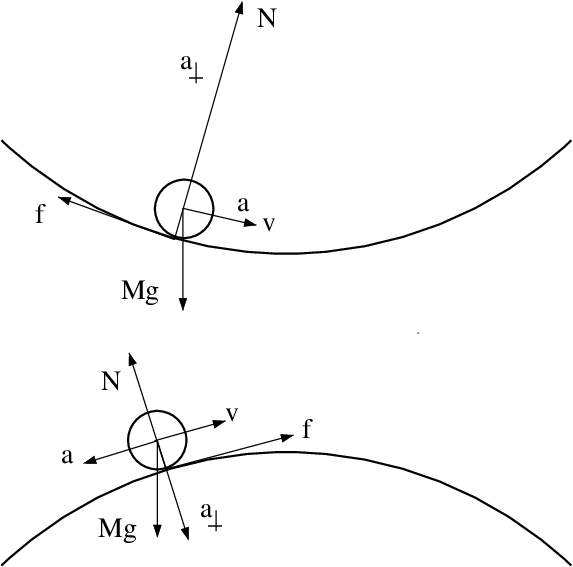

In [14]:
from IPython import display
display.Image("./krefter.png", width=400)

<b>Figur 1.</b> Kule som ruller på et krumt underlag. Her er $v$ kulas fart,
$a$ er baneakselerasjon, $a_\perp$ er sentripetalakselerasjon, $Mg$ er tyngdekraft,
$f$ er friksjonskraft og $N$ er normalkraft. Banens helningsvinkel $\beta$ er vinkelen mellom
positiv $x$-akse (horisontal og mot høyre) og retningen til $v$. <br><br>

## Baneform med kubiske *splines*

Baneformen fastlegges ved hjelp av tredjegradspolynomer på de 7 intervallene mellom de 8 tilfeldig valgte skruefestehøydene, slik at både banen $y(x)$, banens deriverte $dy/dx$ og banens andrederiverte $d^2y/dx^2$ er kontinuerlige i skruefestene. Dette gjøres i Python med funksjonen CubicSpline fra SciPy-biblioteket interpolate med kommandoen

*cs = CubicSpline(xfast,yfast,bc_type='natural')*

Her er xfast og yfast tabeller (numpy arrays) med henholdsvis horisontale og vertikale koordinater for skruefestene, og med *bc_type='natural'* velges krumning lik null i de to ytterste skruefestene. Horisontal avstand mellom skruefestene er 200 mm slik at xfast = (0,0.200,...,1.400) m. Vertikale koordinater for skruefestene fastlegges ved å trekke tilfeldige tall med numpy-funksjonen random.randint.


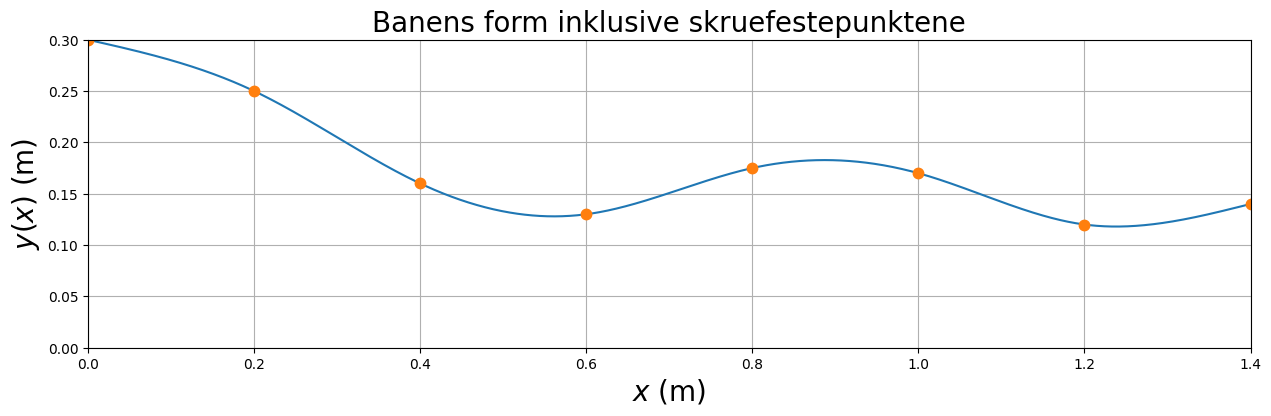

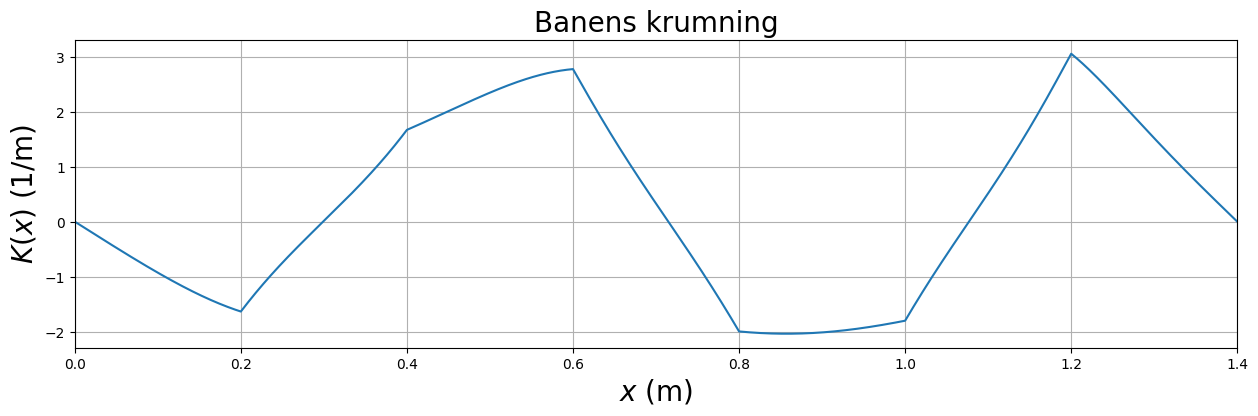

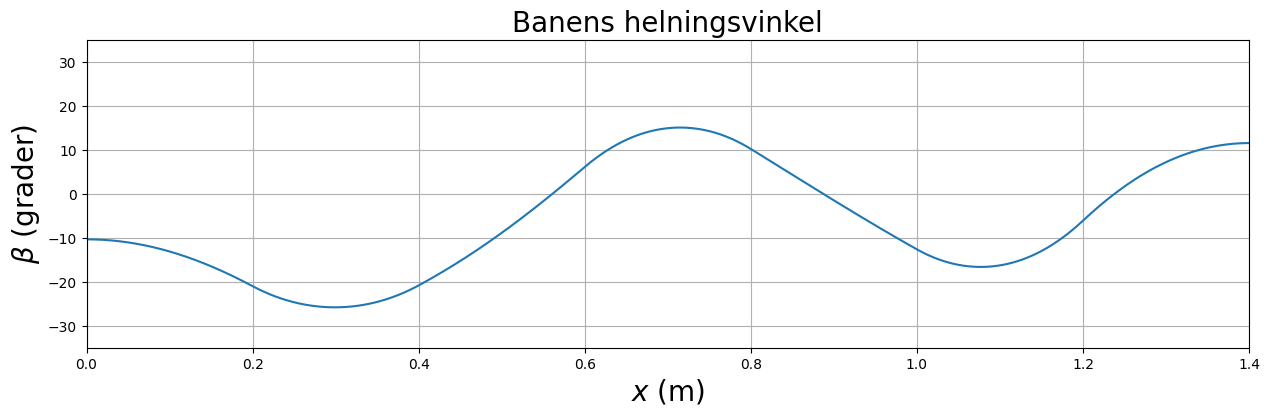

Bakketoppens høyeste punkt (m):  0.183
Banens laveste punkt (m):  0.118
Helningsvinkel i startposisjonen (grader): -10.4
Banens maksimale helningsvinkel (grader): 25.8
De 8 festepunkthøydene (m): [0.3   0.25  0.16  0.13  0.175 0.17  0.12  0.14 ]


In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

#Tallverdier. Tryggest med SI-enheter fra start til mål!
M = 0.031    #kg
g = 9.81     #m/s**2
c = 2/5
h = 0.200    #m
xfast=np.asarray([0,1,2,3,4,5,6,7])*h
xmin = 0
xmax = 1.401
dx = 0.001
x = np.arange(xmin, xmax, dx)
Nx = len(x)

#Skruehøyder:


#Kjør denne cellen så mange ganger dere vil, inntil dere får en baneform dere er fornøyd med.
#Når endelig baneform er valgt:
#Sett inn skruehøydene med 3 desimaler (m) og fjern kommentarsymbolet ("#") i neste linje.
yfast = np.asarray([0.3, 0.250, 0.160, 0.130, 0.175, 0.170, 0.120, 0.140])
#Når endelig baneform er valgt, kan dere gjerne legge inn # i starten på de 8 linjene som beregner yfast[] ovenfor

#Beregninger:
cs = CubicSpline(xfast, yfast, bc_type='natural')
#y = baneformen y(x)
y = cs(x)
#dydx = dy/dx = y'(x) (dimensjonsløs)
dydx = cs(x,1)
#d2ydx2 = y''(x) (enhet 1/m)
d2ydx2 = cs(x,2)
#K = 1/R = banens krumning (1/m)
K = d2ydx2/(1+dydx**2)**(1.5)
#beta = banens helningsvinkel (rad)
beta = np.arctan(dydx)
#betadeg = banens helningsvinkel (grader)
betadeg = beta*180/np.pi
#startvinkel = helningsvinkel i startposisjonen (grader)
startvinkel = betadeg[0]
#maksvinkel = banens maksimale helningsvinkel, i absoluttverdi (grader)
maksvinkel = np.max(np.abs(betadeg))

#Plotting av banens form y(x)
plt.figure(figsize=(15,4))
plt.plot(x,y)
plt.plot(xfast,yfast,'.',markersize=15)
plt.title('Banens form inklusive skruefestepunktene',fontsize=20)
plt.xlabel('$x$ (m)',fontsize=20)
plt.ylabel('$y(x)$ (m)',fontsize=20)
plt.ylim(0,0.300)
plt.xlim(0,1.400)
plt.grid()
plt.show()

#Plotting av banens krumning
plt.figure(figsize=(15,4))
plt.plot(x,K)
plt.title('Banens krumning',fontsize=20)
plt.xlabel('$x$ (m)',fontsize=20)
plt.ylabel('$K(x)$ (1/m)',fontsize=20)
plt.xlim(0,1.400)
plt.grid()
plt.show()


#Plotting av banens helningsvinkel
plt.figure(figsize=(15,4))
plt.plot(x,betadeg)
plt.title('Banens helningsvinkel',fontsize=20)
plt.xlabel('$x$ (m)',fontsize=20)
plt.ylabel(r'$\beta$ (grader)',fontsize=20)
plt.ylim(-35,35)
plt.xlim(0,1.400)
plt.grid()
plt.show()

y37 = y[400:1400]
y27 = y[200:1400]
y37min = np.min(y37)
y37max = np.max(y37)
y27min = np.min(y27)
y27max = np.max(y27)
print('Bakketoppens høyeste punkt (m): %6.3f' %y37max)
print('Banens laveste punkt (m): %6.3f' %y27min)
print('Helningsvinkel i startposisjonen (grader): %4.1f' %startvinkel)
print('Banens maksimale helningsvinkel (grader): %4.1f' %maksvinkel)
print('De 8 festepunkthøydene (m):', yfast)

## Numerisk beregnede fysiske størrelser
*I neste celle skal dere beregne sentrale fysiske størrelser med utgangspunkt i den valgte baneformen. Fullfør cellen med nødvendig kode slik at de ulike størrelsene beregnes og plottes i pene figurer, i samme format som figurene ovenfor. Husk enhet på alle akser. Der flere kurver vises i samme figur må det framgå hva hver enkelt kurve framstiller. Følgende størrelser skal beregnes og plottes:*
* Kulas hastighet (m/s) som funksjon av horisontal posisjon $x$ (m):
$$v(x)=\sqrt{\frac{10g[y(0)-y(x)]}{7}}$$
* Normalkraft $N$ og friksjonskraft $f$ (N) som funksjon av $x$ (m) i samme figur: <br>
$$N = Mg\cos\beta + M v^2K$$
$$f = \frac{2Mg\sin\beta}{7}$$
* Forholdet $|f/N|$ som funksjon av $x$ (m). <br>
* Kulas hastighet $v$ (m/s) som funksjon av tid $t$ (s). <br>
* Potensiell energi, kinetisk energi og total energi (J) som funksjon av $x$ (m). <br>

*Skriv til slutt ut tallverdier for kulas rulletid (s), slutthastighet (m/s) og tilhørende total mekanisk energi (J).*

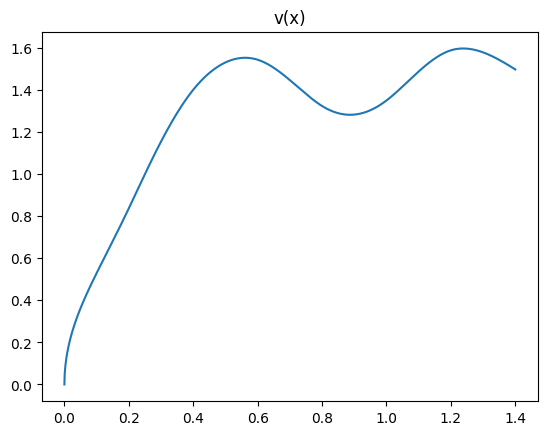

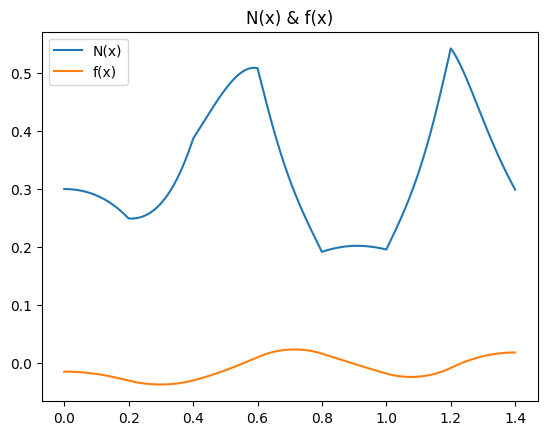

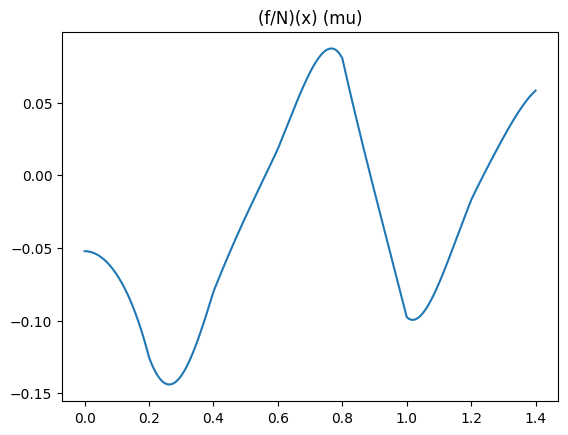

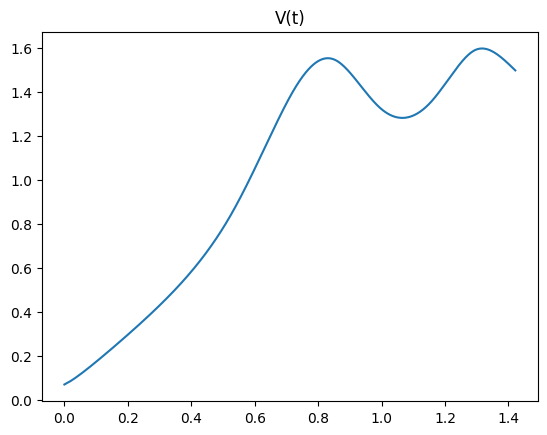

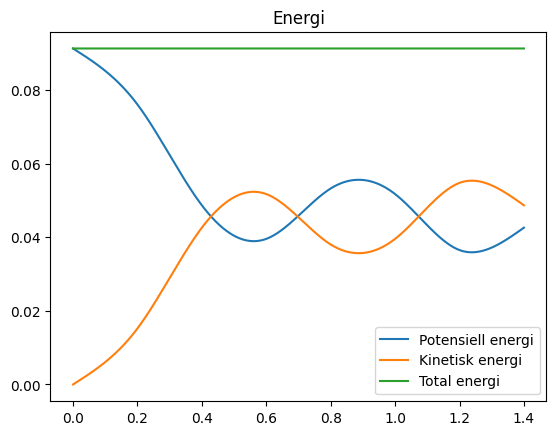

rulletid: 1.42s
sluttfart: 1.5m/s
total mekanisk energi: 0.091


In [16]:

#Numerisk beregning og plotting av de fysiske størrelsene v(x), N(x), f(x), f/N|, v(t), Epot(x), Ekin(x), Etot(x)

def v(x):
  return np.sqrt(10*g*(yfast[0]-y)/7)

def makeTimes(velocities):
  time = 0
  times = [0]
  for v in (velocities*np.cos(beta))[1:]:
      times += [time]
      time += dx/v

  return times

velocity = v(x)
t = makeTimes(velocity)

def N(x):
  return M*g*np.cos(beta)+M*v(x)**2*K
def f(x):
  return 2*M*g*np.sin(beta)/7
def fdividedbyN(x):
  return f(x)/N(x)
def velocityTime(time):
  for x in range(len(velocity)):
      if t[x] > time: return velocity[x]

def Epot(x):
  return M*g*y
def Ekin(x):
  return M*g*(0.3-y)
def Etot(x):
  return Epot(x)+Ekin(x)

velocity = v(x)
#Plotting av v(x), N(x), f(x), f/N|, v(t), Epot(x), Ekin(x), Etot(x)
plt.plot(x,velocity)
plt.title("v(x)")
plt.show()
plt.plot(x,N(x),label="N(x)")
plt.plot(x,f(x),label="f(x)")
plt.legend()
plt.title("N(x) & f(x)")
plt.show()
plt.plot(x,fdividedbyN(x),label="(f/N)(x)")
plt.title("(f/N)(x) (mu)")
plt.show()
plt.plot(t,[velocityTime(time) for time in t])
plt.title("V(t)")
plt.show()
plt.plot(x,Epot(x), label="Potensiell energi")
plt.plot(x,Ekin(x),label="Kinetisk energi")
plt.title("Kinetisk Energi")
plt.plot(x,Etot(x),label="Total energi")
plt.legend()
plt.title("Energi")
plt.show()

#Utskrift av rulletid, sluttfart, total mekanisk energi
print(f"rulletid: {round(makeTimes(v(x))[-1],2)}s")
print(f"sluttfart: {round(v(x)[-1],2)}m/s")
print(f"total mekanisk energi: {round(np.mean(Etot(x)),3)}")



## Numerisk vs eksperimentell bane

*Fra Tracker har dere eksportert eksperimentelle tallverdier for (t,x,y) til en tekstfil, f eks data.txt. I neste celle skriver dere kode som leser innholdet i data.txt og oppretter numpy arrays for (t,x,y). Det holder å lese inn data fra ett rulleforsøk. Slik importeres semikolonseparerte data fra en tekstfil data.txt:*
```python
import pandas as pd
data=pd.read_csv("data.txt",sep=";")
t_exp=np.array(data["t"])
x_exp=np.array(data["x"])
y_exp=np.array(data["y"])
```
*t_exp, x_exp og y_exp er nå tabeller (numpy arrays) med de verdiene som ble vist i kolonnene i Tracker. Første linje i fila data.txt må være <br><br>
t;x;y <br><br>
Deretter følger tallverdier for t, x og y fra og med 2. linje, f eks <br><br>
0.300;0.0016;0.3001 <br>
0.334;0.0022;0.2995 <br>
... <br><br>
Lag en figur som viser både numerisk og eksperimentell bane, dvs y(x) og y_exp(x_exp).*

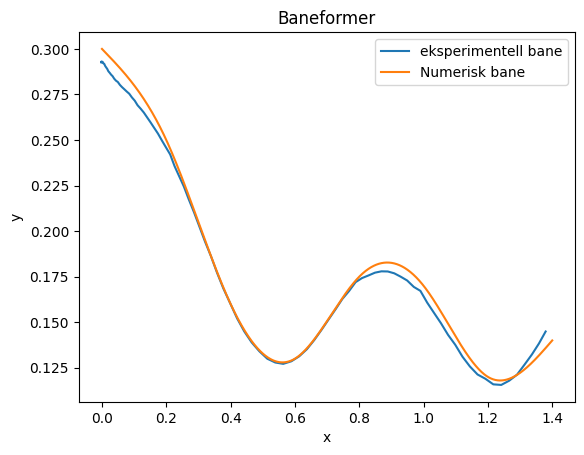

In [17]:
#Innlesing av eksperimentelle verdier for t, x og y
import pandas as pd
data=pd.read_csv("balltest1.txt",sep=";")
t_exp=np.array(data["t"]) -0.1
x_exp=np.array(data["x"])+0.02
y_exp=np.array(data["y"]) -0.01

#Plotting av numerisk og eksperimentell bane
plt.plot(x_exp,y_exp,label="eksperimentell bane") #y_exp
plt.plot(x,y,label="Numerisk bane")
plt.legend()
plt.title("Baneformer")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Numerisk vs eksperimentell hastighet

*I neste celle kan dere bruke numpyfunksjonen gradient til å beregne den eksperimentelle hastigheten til kula, både komponentene $v_x$ og $v_y$ og absoluttverdien $v = \sqrt{v_x^2+v_y^2}$. Tips:*
```python
vx_exp = np.gradient(x_exp,t_exp)
```
*På tilsvarende vis lages vy_exp, og deretter*
```python
v_exp = np.sqrt(vx_exp**2+vy_exp**2)
```
*Lag figurer som sammenligner numerisk og eksperimentell $v(x)$, $v(t)$ og $x(t)$. Disse tre figurene gir et godt inntrykk av samsvaret mellom teoretisk og eksperimentell bevegelse.*

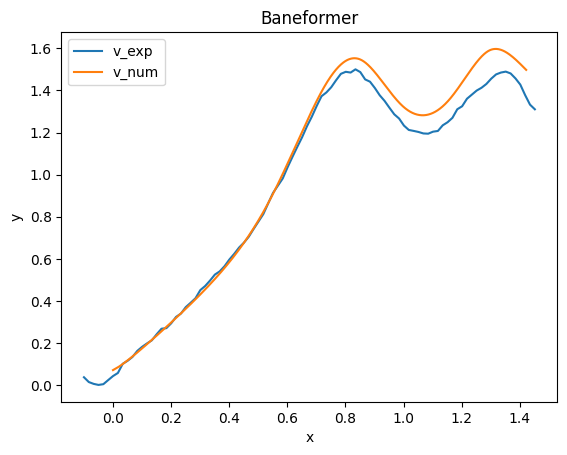

In [18]:
#Beregning av eksperimentell v_x, v_y og v
v_x_exp = np.gradient(x_exp,t_exp)
v_y_exp = np.gradient(y_exp,t_exp)

def v_exp(xexp,yexp,texp):
    return np.sqrt(np.gradient(xexp,texp)**2 + np.gradient(yexp,texp)**2)

#Figurer som sammenligner numerisk og eksperimentell v(x), v(t) og x(t)
plt.plot(t_exp,v_exp(x_exp,y_exp,t_exp),label="v_exp")
plt.plot(t,[velocityTime(time)for time in t],label="v_num")
plt.legend()
plt.title("Baneformer")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Numeriske vs eksperimentelle mekaniske energier

*I neste celle beregner dere eksperimentelle mekaniske energier: Kinetisk energi (translasjonsenergi og rotasjonsenergi), potensiell energi og total mekanisk energi. Sammenlign numerisk og eksperimentell total mekanisk, kinetisk og potensiell energi i en og samme figur (i alt 6 kurver).*

Text(0.5, 1.0, 'Numerisk mot eksperimentell totalenergi')

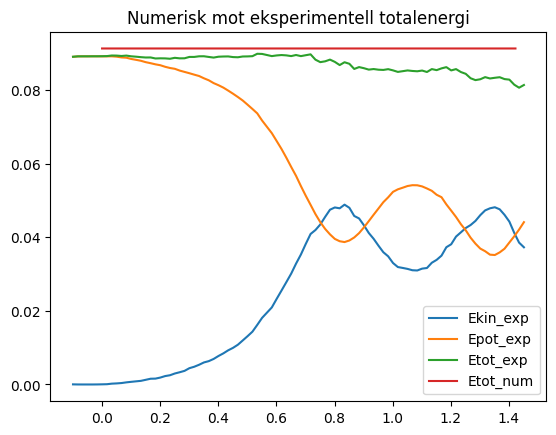

In [19]:
#Beregning av eksperimentell Etrans_exp, Erot_exp, Ekin_exp, Epot_exp, Etot_exp
def Etrans_exp(velocity):
    return 0.5*M*velocity**2

def Erot_exp(velocity):
    return 0.5*c*M*velocity**2
def Ekin_exp(velocity):
    return 0.5*(1+c)*M*velocity**2
def Epot_exp(y_experimental):
    return M*g*y_experimental
def Etot_exp(velocity,y_experimental):
    return Ekin_exp(velocity)+Epot_exp(y_experimental)


#Figurer som sammenligner numerisk og eksperimentell kinetisk, potensiell og total mekanisk energi
plt.plot(t_exp,Ekin_exp(v_exp(x_exp,y_exp,t_exp)),label="Ekin_exp")
plt.plot(t_exp,Epot_exp(y_exp),label="Epot_exp")
plt.plot(t_exp,Etot_exp(v_exp(x_exp,y_exp,t_exp),y_exp),label="Etot_exp")

plt.plot(t,Etot(x),label="Etot_num")
plt.legend()
plt.title("Numerisk mot eksperimentell totalenergi")


## Er den mekaniske energien bevart i rulleforsøkene?
*Fordel de 8 rulleforsøkene på gruppas medlemmer. For hvert rulleforsøk: Bruk posisjons- og fartsdata i start- og sluttpunktet fra Tracker til å beregne total mekanisk energi $E_i$ i startposisjonen (ved $x=0$) og $E_f$ i sluttposisjonen (ved $x=1.40$ m). I neste celle: Skriv de 8 verdiene for $E_i$ og $E_f$ inn i numpy arrays. Beregn 8 verdier for $\Delta E = E_i-E_f$ og deretter midlere tap i mekanisk energi med usikkerhet (den såkalte standardfeilen). Skriv ut resultatet på formen $\Delta E = (2.5 \pm 0.4)$ mJ, med egne tallverdier selvsagt. En passende enhet for $\Delta E$ er trolig mJ.*

In [20]:
#Beregning av Delta E = E_i - E_f for 8 vellykkede rulleforsøk

DeltaEList = []
for i in range(1,9):
    data=pd.read_csv(f"balltest{i}.txt",sep=";")
    t_exp=np.array(data["t"])
    x_exp=np.array(data["x"])
    y_exp=np.array(data["y"])
    DeltaE = Etot_exp(v_exp(x_exp,y_exp,t_exp),y_exp)[0]- Etot_exp(v_exp(x_exp,y_exp,t_exp),y_exp)[-1]
    DeltaEList.append(DeltaE)
#Beregning av middelverdi og standardfeil for Delta E
standardavvik = np.var(DeltaEList)
middelverdi = np.mean(DeltaEList)

#Utskrift av Delta E på formen Delta E = (Middelverdi +- Standardfeil) mJ
print(f"Delta E = ({middelverdi*1000:.2f} ± {standardavvik*1000:.2f}) mJ")

Delta E = (17.10 ± 0.13) mJ


## Noen avsluttende spørsmål
*Første spørsmål tar utgangspunkt i de eksperimentelle resultatene:*
- Er beregnet middelverdi og usikkerhet for tapt mekanisk energi i samsvar med antagelsen om at kula ruller rent uten å gli? I motsatt fall: Diskuter kort noen faktorer som kan bidra til at mekanisk energi går tapt i rulleforsøkene. <br>

*De neste spørsmålene tar utgangspunkt i de teoretiske (numeriske) resultatene:* <br>
- Er grafen for $f(x)$ rimelig, med utgangspunkt i baneformen $y(x)$? Vurder spesielt topp- og bunnpunktene, samt fortegnet på $f(x)$ underveis.
- Er grafen for $N(x)$ rimelig, med utgangspunkt i baneformen $y(x)$? Vurder spesielt om $N$ har stor verdi på forventede steder.
- Maksimal statisk friksjonskraft er som kjent bestemt av $\mu_s N$. Hva må den statiske friksjonskoeffisienten $\mu_s$ mellom kule og bane minst være for at kula hele veien skal rulle rent uten å gli? Grafen for $|f(x)/N(x)|$ gir grunnlag for å svare på dette.
- Grafen for banens krumning $K(x)$ er kontinuerlig (sammenhengende), med tydelige knekkpunkter for hver 20. cm. Er dette som forventet? Forklar.
- I det teoretiske grunnlaget er det antatt at kulas radius er liten sammenlignet med banens krumningsradius. Er denne antagelsen i orden langs hele banen? Sammenlign kuleradien med banens minste krumningsradius.

1. vi ser maksimal Kin_energi til ballen er runt 50mJ. med en delta_E på 17mJ, som tilsvarer et energitap på rundt 34%, dvs en betydelig størrelse. Mulige feilkilder kan komme av:
    Banen og støttene som holder banen oppe er litt fleksibel. Dette  kan dempe ballen i dalene på banen, og dermed "stjele" energi 
    
    Ballen ruller litt fra side til side i sporet på banen, slik at når den treffer en side, får ballen kontakt med materiale som går raskere forbi enn den delen av ballen som kontakter siden av sporet. dette gir også et spinn på ballen.

    Menneskelig feil som fører til unøyaktige målinger, og dermed unøyaktig målt energitap.

    Kula er ikke nødvendigvis helt rund eller har jevn massefordeling.

2. den ser rimelig ut. f(x) har bunnpunkter der y(x) er brattest nedover, og toppunkter der y(x) er brattest oppover. fortegnet til f(x) sier også at friksjonskrafta er negativ i nedoverbakker og positiv i oppoverbakker som samsvarer med fysikken fra forelesning.

3. Ja, den samsvarer. N(x) er størst ved bunnpunktene. logikken sier også at N(x) bør være størst der krumningen er størst. vi ser at krumningens toppunkter og N(x) sine toppunkter samsvarer godt.

4. maks absoluttverdi av f/N er ca 0.14. det vil si at der friksjonen er størst må mu være minst 0.14 for at kula ikke skal skli. dersom mu er mindre vil ballen skli og gå over til dynamisk friksjon, som fører til energitap.

5. Ja, dette er forventet. støttene til banen er plassert hver 20. cm. Etter hver av disse vil banen ha en ny krumningsfaktor, helt til neste støtte da krumningen kan endre seg. 

6. fra krumningsgrafen ser vi at største krumning er ca 3 (m^-1). radiusen blir ca 1/3 meter. ballen har en radius på 1cm. Forholdet mellom ballen og minste krumningsradius blir derfor 1/30. Antagelsen om at ballen har tilstrekkelig liten radius sammenlignet med krumningsradiusen holder derfor for hele banen.